In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [110]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv') #take data input

In [111]:
df.head()  #print data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [112]:
df.info()   #to check data fields -> whether they are null, what are their data type etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [113]:
df.duplicated().sum()  #check number of duplicate rows(tuples)

0

In [114]:
df['Exited'].value_counts()   #check how many left the bank

Exited
0    7963
1    2037
Name: count, dtype: int64

We are not needed first three columns which are not contributing anything to ouput, so it's to remove them

In [115]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [116]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Now, we will transform the **GEOGRAPHY** AND **GENDER** Column using *One-Hot Encoding*

*One-hot encoding* is a technique used to represent categorical data as numerical data. It is a common preprocessing step in machine learning, as many machine learning algorithms cannot directly work with categorical data.

Example:-

color | one-hot encoding
-------|------------
red   | [1, 0, 0]
green | [0, 1, 0]
blue  | [0, 0, 1]

In [117]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)  #if drop_first is false, then all categorical columns will created, otherwise last one will not be created

In [118]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [119]:
#Separate Features and Output
X=df.drop(columns='Exited')  #take every column except "Exited" Column
y=df['Exited'] #take "Exited" column

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [120]:
#Since, values are deviating too much, so we scaled them

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [121]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [122]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [123]:
model=Sequential()

#first layer -> three perceptrons, Sigmoid as activation function and input dimensions are 11
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [124]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 36        
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.compile(loss='binary_crossentropy',optimizer='Adam')   #Used log loss and use Adam optimization for gradient descent

In [136]:
history = model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2) #it will store each epoch

Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4207 - val_loss: 0.4251
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4200 - val_loss: 0.4244
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4194 - val_loss: 0.4236
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4187 - val_loss: 0.4229
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4180 - val_loss: 0.4222
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4174 - val_loss: 0.4215
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4168 - val_loss: 0.4209
Epoch 8/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4162 - val_loss: 0.4203
Epoch 9/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4156 - val_loss: 0.4196
Epoch 10/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4150 - val_loss: 0.4191

In [127]:
model.layers[0].get_weights()  #get the weight and layers, use the notation learnt in previous notes

[array([[-0.10279049,  0.25952765,  0.15835698],
        [-1.259096  , -0.7914582 , -2.0935574 ],
        [ 0.25254092, -0.01472991, -0.06050193],
        [-0.05354114, -0.5238852 , -0.33773166],
        [ 0.41649723, -0.08759181, -0.10740013],
        [ 0.00673312,  0.31912076, -0.1840104 ],
        [ 0.79569393,  0.7366303 ,  0.51376563],
        [-0.25170058,  0.09799685, -0.08783951],
        [-0.44892284, -0.67723805, -0.20093532],
        [ 0.05827694, -0.02930672, -0.13708217],
        [ 0.68759525,  0.29181322,  0.29907396]], dtype=float32),
 array([0.30899918, 0.15094228, 0.29116833], dtype=float32)]

In [128]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [129]:
y_pred=np.where(y_log>0.5,1,0)

In [130]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7925

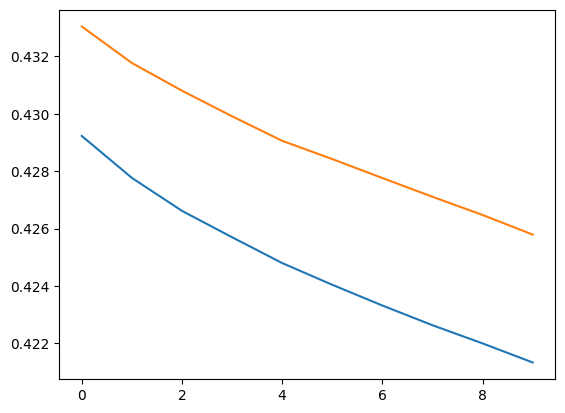

In [133]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

To increase the model performance, we can increase the **number of epochs**, use **RELU function** instead of sigmoid, **increase the nodes**(which is intially 3), increase the **number of hidden layers**, use the **validation split**